## Logistic Regression: 

You are given a dataset named football.csv containing information about football players. Your task is to build a machine learning model to classify whether
a player’s contribution type is more inclined towards being type 1 or 0, where 1 indicates players with contributions in the attacking half of the football field and 0 indicates players with contributions in the defending half of the field. The classification column is “contribution type”.

1. Train a Logistic Regression model using the training data. Implement logistic regression
from scratch. You’re NOT ALLOWED to use sklearn for this question.
2. Make predictions on the test data using the trained model.
3. Calculate the F1 score, accuracy score, and confusion matrix to evaluate the model’s performance.

In [1]:
import pandas as pd
import numpy as np
import datapurifier as dp
from datapurifier import Mleda, MlReport

In [8]:
df = pd.read_csv("football.csv")
report = MlReport(df)
report


Sample of Dataframe:


,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_jersey_number,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
2435,189899,V. Wormgoor,71,71,1200000.0,5000.0,32,188,81,687.0,Columbus Crew,USA Major League Soccer,1.0,5.0,NaN,Right,3,2,1,Medium/High,Normal (185+),1800000.0,#Strength,Long Passer (AI),32.0,38.0,56.0,53.0,70.0,81.0,41,28,72,61,58,47,58,62,68,66,31,32,33,66,38,64,72,68,90,22,79,71,34,53,67,66,70,71,65,9,12,15,12,11,NaN,0
4194,239679,P. Mazzocchi,68,70,1400000.0,7000.0,25,180,74,205.0,Venezia FC,Italian Serie A,1.0,7.0,NaN,Right,3,3,1,Medium/Medium,Lean (170-185),2600000.0,NaN,NaN,76.0,56.0,62.0,67.0,65.0,70.0,65,55,64,66,50,67,62,60,62,67,75,76,68,63,67,66,74,71,71,50,64,63,55,54,55,60,66,65,63,12,14,13,8,11,NaN,0
809,167575,A. Shunin,76,76,NaN,NaN,34,191,88,NaN,NaN,NaN,NaN,NaN,1.0,Left,3,1,1,Medium/Medium,Lean (185+),NaN,NaN,Team Player,NaN,NaN,NaN,NaN,NaN,NaN,18,11,12,28,16,14,15,13,30,20,50,39,43,71,48,53,64,30,68,12,36,22,13,47,21,42,16,14,17,77,73,70,75,78,46.0,0
4888,259825,A. Rodríguez,67,73,1600000.0,500.0,21,173,59,114578.0,Club Social y Deportivo Macará,Ecuadorian Serie A,1.0,24.0,NaN,Right,3,3,1,Medium/Medium,Lean (170-185),3800000.0,NaN,NaN,76.0,55.0,61.0,66.0,42.0,47.0,66,66,40,66,32,68,40,33,56,64,77,76,72,66,63,39,47,58,40,54,49,36,67,64,42,49,38,48,46,11,7,6,9,12,NaN,1
3643,236260,A. Santamaría,69,69,1200000.0,7000.0,29,184,79,101114.0,Club Atlas,Mexican Liga MX,1.0,5.0,NaN,Right,3,3,1,Low/High,Normal (170-185),2000000.0,NaN,Power Header,61.0,60.0,65.0,64.0,71.0,71.0,61,55,68,69,58,64,59,64,66,65,53,68,60,58,61,72,45,72,73,60,71,71,62,62,62,66,71,72,70,12,11,10,7,13,NaN,0
500,173909,K. Boateng,78,78,6500000.0,46000.0,34,185,86,166.0,Hertha BSC,German 1. Bundesliga,1.0,27.0,NaN,Right,4,4,3,Medium/Medium,Normal (185+),11100000.0,NaN,"Leadership, Flair, Long Shot Taker (AI), Outsi...",69.0,78.0,77.0,80.0,66.0,74.0,72,76,74,80,82,80,80,71,74,84,66,72,72,72,70,84,78,54,80,78,82,64,76,78,68,82,58,73,66,6,11,15,16,6,NaN,0
6068,209369,B. Turgott,64,64,625000.0,1000.0,27,183,65,113173.0,Östersunds FK,Swedish Allsvenskan,1.0,7.0,NaN,Right,3,3,1,High/Medium,Lean (170-185),781000.0,NaN,Technical Dribbler (AI),76.0,64.0,54.0,68.0,23.0,61.0,61,68,48,55,54,69,48,53,50,67,75,76,71,65,62,59,53,69,61,62,53,28,67,51,54,66,19,19,16,14,11,12,11,8,NaN,1
1487,230497,Roni Gameira,74,74,4200000.0,16000.0,29,180,76,1039.0,Club Athletico Paranaense,Campeonato Brasileiro Série A,1.0,9.0,NaN,Right,3,3,1,High/Low,Lean (170-185),8000000.0,NaN,"Finesse Shot, Technical Dribbler (AI)",80.0,75.0,58.0,73.0,29.0,62.0,61,77,76,61,76,73,55,56,52,71,78,82,78,77,65,73,64,58,70,71,44,44,74,55,72,77,10,25,24,7,7,9,8,10,NaN,1
7417,255177,B. Anunga,60,66,350000.0,1000.0,24,180,81,114162.0,Nashville SC,USA Major League Soccer,1.0,27.0,NaN,Right,4,3,1,High/High,Normal (170-185),578000.0,NaN,NaN,62.0,40.0,58.0,56.0,55.0,64.0,49,35,37,65,42,50,47,37,62,64,61,62,60,58,60,48,60,47,77,38,56,59,61,59,46,55,62,50,54,13,9,9,13,14,NaN,1
3689,241419,M. Bird,69,77,2900000.0,5000.0,20,183,68,91.0,Derby County,English League Champi

Shape of DataFrame:  (7772, 66)

Categorical columns: ['short_name', 'club_name', 'league_name', 'preferred_foot', 'work_rate', 'body_type', 'player_tags', 'player_traits']

Numerical columns: ['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_jersey_number', 'nation_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_

,column,unique_count,unique_percent
0,sofifa_id,7772,100.000000
1,short_name,7524,96.809058
2,overall,46,0.591868
3,potential,42,0.540401
4,value_eur,244,3.139475
...,...,...,...
61,goalkeeping_kicking,71,0.913536
62,goalkeeping_positioning,67,0.862069
63,goalkeeping_reflexes,59,0.759135
64,goalkeeping_speed,51,0.656202


You can access this dataframe by typing '<report_obj>.unique_df'
To drop column with particular or minimum threshold use 'mlutils.drop_column_based_on_uniqueness_threshold(df, threshold=0)'

Description of Data:



,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
count,7772.000000,7772.000000,7772.000000,7.706000e+03,7711.000000,7772.000000,7772.000000,7772.000000,7711.000000,7711.000000,7711.000000,533.000000,7772.000000,7772.000000,7772.000000,7.306000e+03,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,709.000000,7772.000000
mean,223576.030108,68.864642,72.068708,4.356581e+06,12104.526002,26.784483,181.484174,75.547735,51470.375178,1.360913,16.528466,12.067542,2.998713,2.457669,1.147967,8.235466e+06,68.607107,54.401954,60.148096,64.637689,55.528529,68.312473,52.968863,48.333248,55.050566,62.389475,44.871462,58.453680,50.493181,45.413278,56.859238,61.838008,65.953680,66.069609,65.342126,65.050051,64.889089,60.591611,67.217190,67.906330,68.199434,49.949949,59.799151,51.452265,53.215260,57.015440,49.969506,61.966804,51.276248,52.237133,49.731987,15.892306,15.652728,15.534869,15.800051,15.994339,40.332863,0.456253
std,26710.971306,5.951090,6.075526,1.047773e+07,24717.270914,4.318905,6.861546,7.046195,54493.246508,0.760792,15.471724,6.937905,0.685530,0.784704,0.471261,2.050041e+07,11.701207,14.351594,9.579853,9.363637,15.643798,8.515295,17.849182,19.583571,16.894676,13.281671,17.892006,17.912354,18.395100,17.871294,14.142718,15.414060,14.505087,14.401192,14.484987,7.938847,14.222438,13.066384,12.170355,15.077861,11.788985,19.311624,16.262309,20.107885,19.310655,13.574779,15.680751,10.884304,19.652449,20.913706,20.637531,17.452831,16.749303,16.299055,17.172838,17.858210,10.211288,0.498115
min,41.000000,48.000000,53.000000,2.500000e+04,500.000000,17.000000,156.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+04,28.000000,18.000000,25.000000,29.000000,16.000000,31.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,0.000000
25%,207560.750000,65.000000,68.000000,7.250000e+05,2000.000000,24.000000,177.000000,70.000000,503.000000,1.000000,6.000000,6.000000,3.000000,2.000000,1.000000,1.200000e+06,62.000000,44.000000,54.000000,59.000000,42.500000,63.000000,43.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.750000,32.000000,50.000000,58.000000,58.000000,59.000000,58.000000,60.000000,57.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,43.000000,48.000000,40.000000,56.000000,35.000000,34.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000,33.000000,0.000000
50%,2


Null Information of Dataframe: 


There are total 18 columns having null values out of 66 columns in dataframe



,column_name,null_rows,null_percentage
0,nation_jersey_number,7239,93.142048
1,goalkeeping_speed,7063,90.877509
2,player_tags,6900,88.780237
3,player_traits,2901,37.326300
4,pace,709,9.122491
5,shooting,709,9.122491
6,passing,709,9.122491
7,dribbling,709,9.122491
8,defending,709,9.122491
9,physic,709,9.122491


### Data Preprocessing

In [22]:
## Preprocessing dataset

### Removing categorical columns, more null values columns, unrelated columns (ID, ...)

df.drop(axis = "columns", labels = ["goalkeeping_speed", "short_name", "value_eur", "wage_eur",
                                          "age", "height_cm", "weight_kg", "club_team_id", "club_name",
                                          "league_name", "league_level", "club_jersey_number", "nation_jersey_number",
                                          "preferred_foot", "weak_foot", "body_type", "release_clause_eur", "player_tags",
                                          "player_traits", "work_rate"], inplace = True)
df.drop(axis = "columns", labels = ["sofifa_id", "overall", "potential", "skill_moves", "international_reputation"], inplace = True)

## Correlation (if we avoid removing correlated attr accuracy increases)

# cor_matrix = df1.corr().abs() 
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) 
# corr_threshold = 0.95
# columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)] 
# df2 = df1.drop(columns_to_drop, axis=1) 
# print("\nTotal Columns After dropping highly correlated columns: ", len(df2.columns))
# print("\n")
# print(df2.columns)

## dropping rows
# data = df2.dropna()
data = df.fillna(df.median())
print("Dataframe Shape: ", data.shape)

Dataframe Shape:  (7772, 41)


### Splitting the dataset and Training the model

In [23]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['contribution_type'])
y = data['contribution_type']

# 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6217, 40)
Shape of y_train: (6217,)
Shape of X_test: (1555, 40)
Shape of y_test: (1555,)


## Logistic Regression

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_train = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_train]
        return class_pred

In [25]:
lr = LogisticRegression(lr = 0.01)
lr.fit(X_train, y_train)

In [26]:
y_pred = lr.predict(X_test)
acc = accuracy(y_pred, y_test)
acc

0.8302250803858521

In [28]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
    # Calculate the accuracy score
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy Score: {accuracy:.2f}')

    # Calculate the F1 score
    f1 = f1_score(y_true, y_pred)
    print(f'F1 Score: {f1:.2f}')

    # Calculate the confusion matrix
    confusion = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(confusion)

y_pred = lr.predict(X_test)
evaluate_model(y_test, y_pred)

Accuracy Score: 0.83
F1 Score: 0.84
Confusion Matrix:
[[609 245]
 [ 19 682]]


[[609 245]
 [ 19 682]]


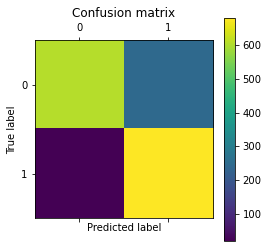

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()